### WASHINGTON DOL REGISTERED ELECTRIC VEHICLES AS AT NOV 30, 2023

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.mwev_columns', None)

In [48]:
# To load dataset
# link (https://catalog.data.gov/dataset/electric-vehicle-population-data) (updated Dec 16th, 2023)

EV = pd.read_csv('Electric_Vehicle_Population_Data.csv')
EV.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [49]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         163003 non-null  object 
 1   County                                             162999 non-null  object 
 2   City                                               162999 non-null  object 
 3   State                                              163003 non-null  object 
 4   Postal Code                                        162999 non-null  float64
 5   Model Year                                         163003 non-null  int64  
 6   Make                                               163003 non-null  object 
 7   Model                                              163003 non-null  object 
 8   Electric Vehicle Type                              163003 non-null  object

#### DATA CLEANING AND PREPARATION

In [50]:
#Duplicate rows check
EV.duplicated().sum()

0

In [51]:
#Remove rows which state isn't WA. They don't have Washington DOL Vehicle ID.
EV = EV[EV['State'] == 'WA']
EV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162637 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         162637 non-null  object 
 1   County                                             162637 non-null  object 
 2   City                                               162637 non-null  object 
 3   State                                              162637 non-null  object 
 4   Postal Code                                        162637 non-null  float64
 5   Model Year                                         162637 non-null  int64  
 6   Make                                               162637 non-null  object 
 7   Model                                              162637 non-null  object 
 8   Electric Vehicle Type                              162637 non-null  object 
 9 

In [52]:
#Check for missing values in the entire DataFrame
EV.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     5
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [67]:
EV.nunique()

VIN (1-10)                                            10081
County                                                   39
City                                                    469
State                                                     1
Postal Code                                             542
Model Year                                               22
Make                                                     39
Model                                                   136
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       162637
Vehicle Location                                        541
Electric Utility                                         74
2020 Census Tract                       

#### DATA ANALYSIS AND VISUALIZATION

##### We have 2 Electric Vehicle Type in this data. The Battery Electric Vehicle (BEV) and the Plug-in Hybrid Electric Vehicle (PHEV)

##### MOST COMMON ELECTRIC VEHICLE TYPES, MAKES, MODELS, AND MODEL YEAR

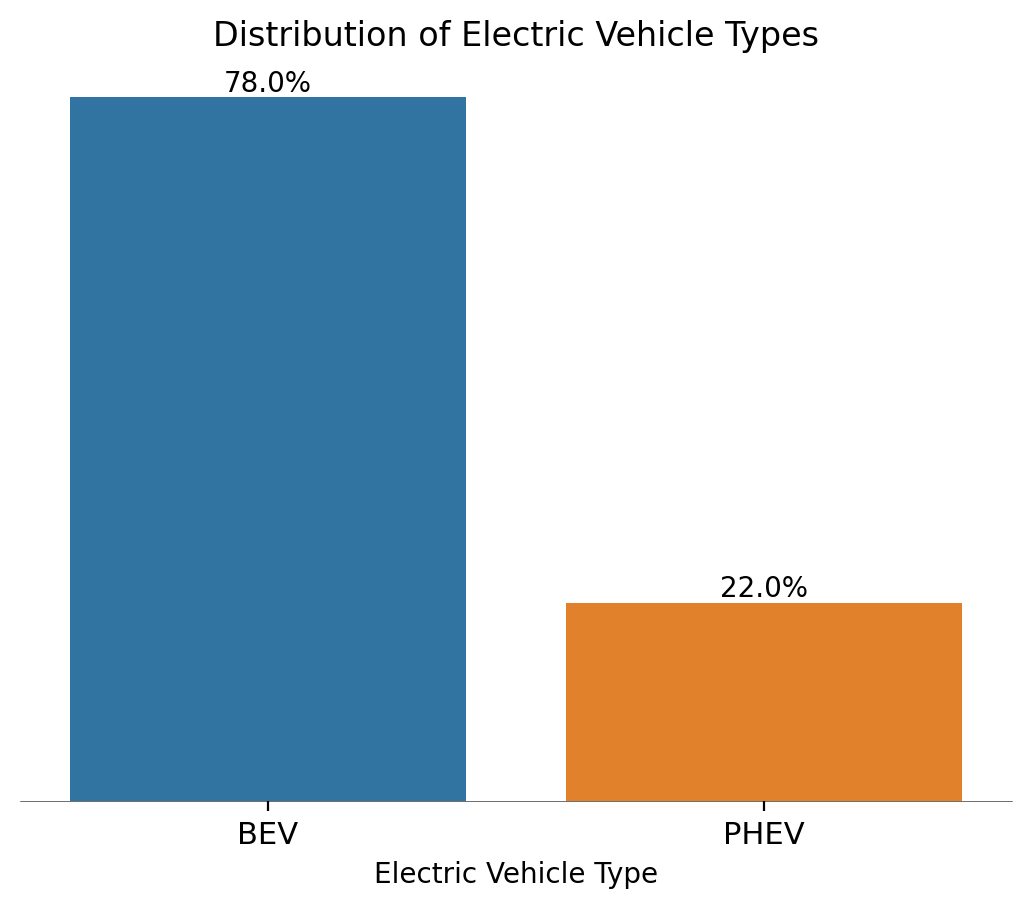

In [68]:
#Percentage of each Electric Vehicle Type registered in Washington DOL

wev = sns.countplot(x = 'Electric Vehicle Type', data = EV)

#Annotate each bar with its percentage
total = len(EV['Electric Vehicle Type'])
for p in wev.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    wev.annotate(percentage, (x, y), ha='center', va='bottom')

##Additional code for better visualization

#To put space between title and y wevis
#wev.set_title('Distribution of Electric Vehicle Types', y=1.05)

#To hide all wevis lines except the bottom line
sns.despine(left=True, right=True, top=True)

#To customize the thickness of the bottom spine
wev.spines['bottom'].set_linewidth(0.2)

#To remove everything on the y-wevis
wev.set_yticks([])
wev.set_yticklabels([])

#Formatting the x-wevis
wev.set_xticks([])
plt.xticks([0, 1], ['BEV', 'PHEV'], fontsize=11)

plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')

#To save image with no background
plt.savefig('Dist of EV Types.png', transparent=True)
plt.show()



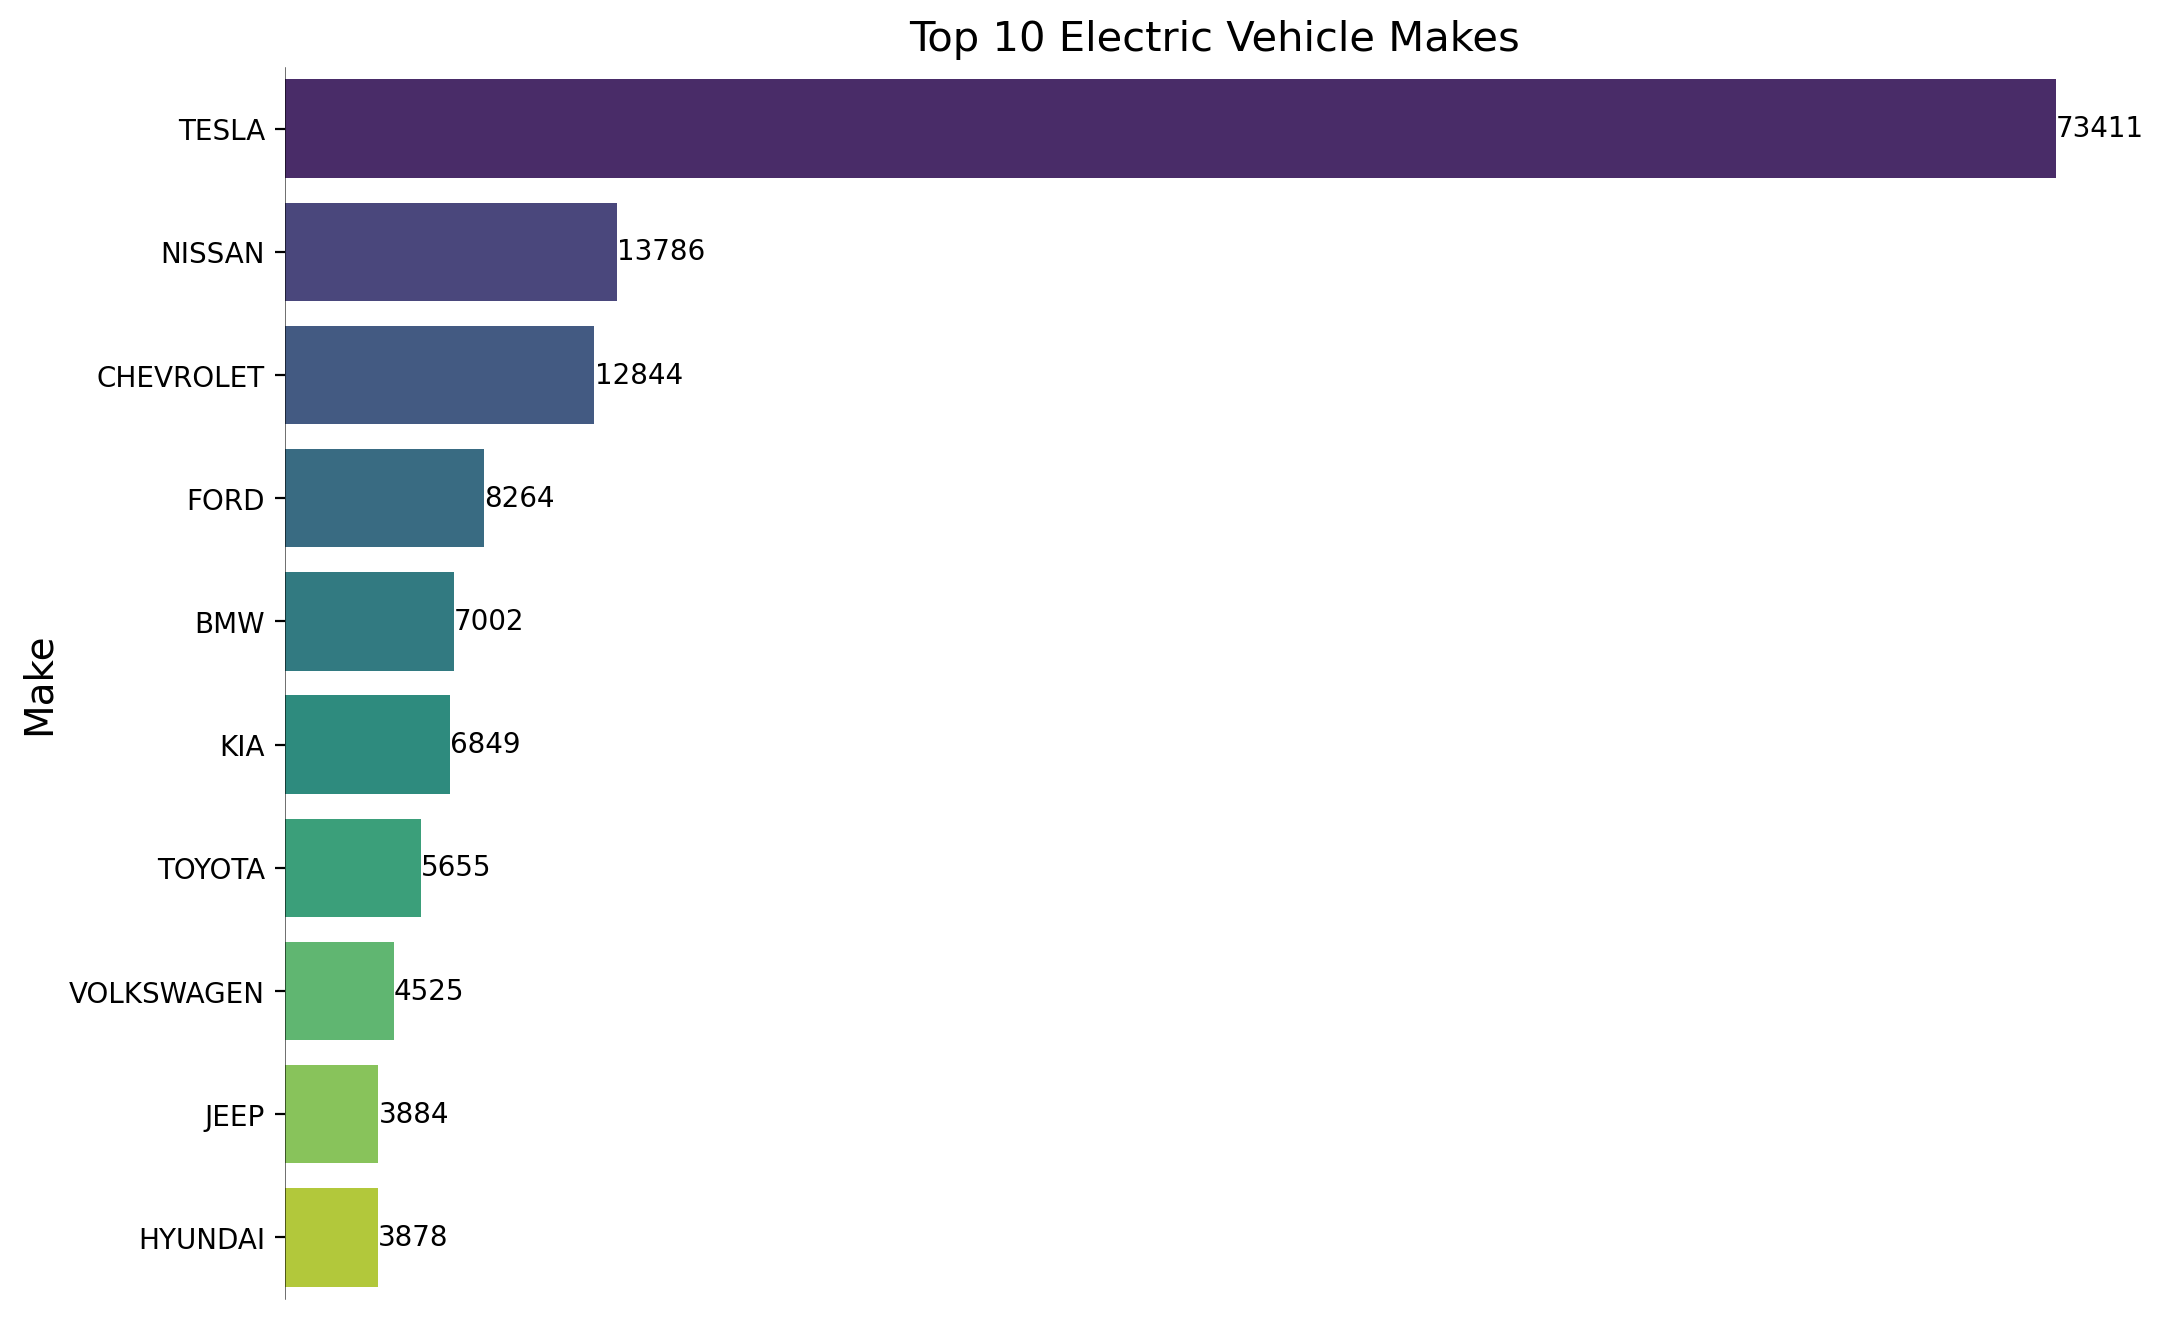

In [54]:
#Top 10 Electric Vehicle Makes

TopMakes = EV['Make'].value_counts().nlargest(10).index
#To filter the EV for the top 10 makes
TMake = EV[EV['Make'].isin(TopMakes)]

plt.figure(figsize=(12, 8))
wev = sns.countplot(y='Make', data=TMake, order=TopMakes, palette='viridis', orient='h')

#Annotate each bar with its count
for p in wev.patches:
    count = int(p.get_width())
    wev.annotate(f'{count}', (p.get_x() + p.get_width() + 10, p.get_y() + p.get_height() / 2), va='center')

#To hide all wevis lines except the bottom line
sns.despine(bottom=True, right=True, top=True)

#To customize the thickness of the bottom spine
wev.spines['left'].set_linewidth(0.2)

#To remove everything on the y-wevis
wev.set_xticks([])
wev.set_xticklabels([])

plt.title('Top 10 Electric Vehicle Makes', fontsize=15)
plt.xlabel('')
plt.ylabel('Make', fontsize=14)

#To save image with no background
plt.savefig('Top 10 EV Makes.png', transparent=True)
plt.show()

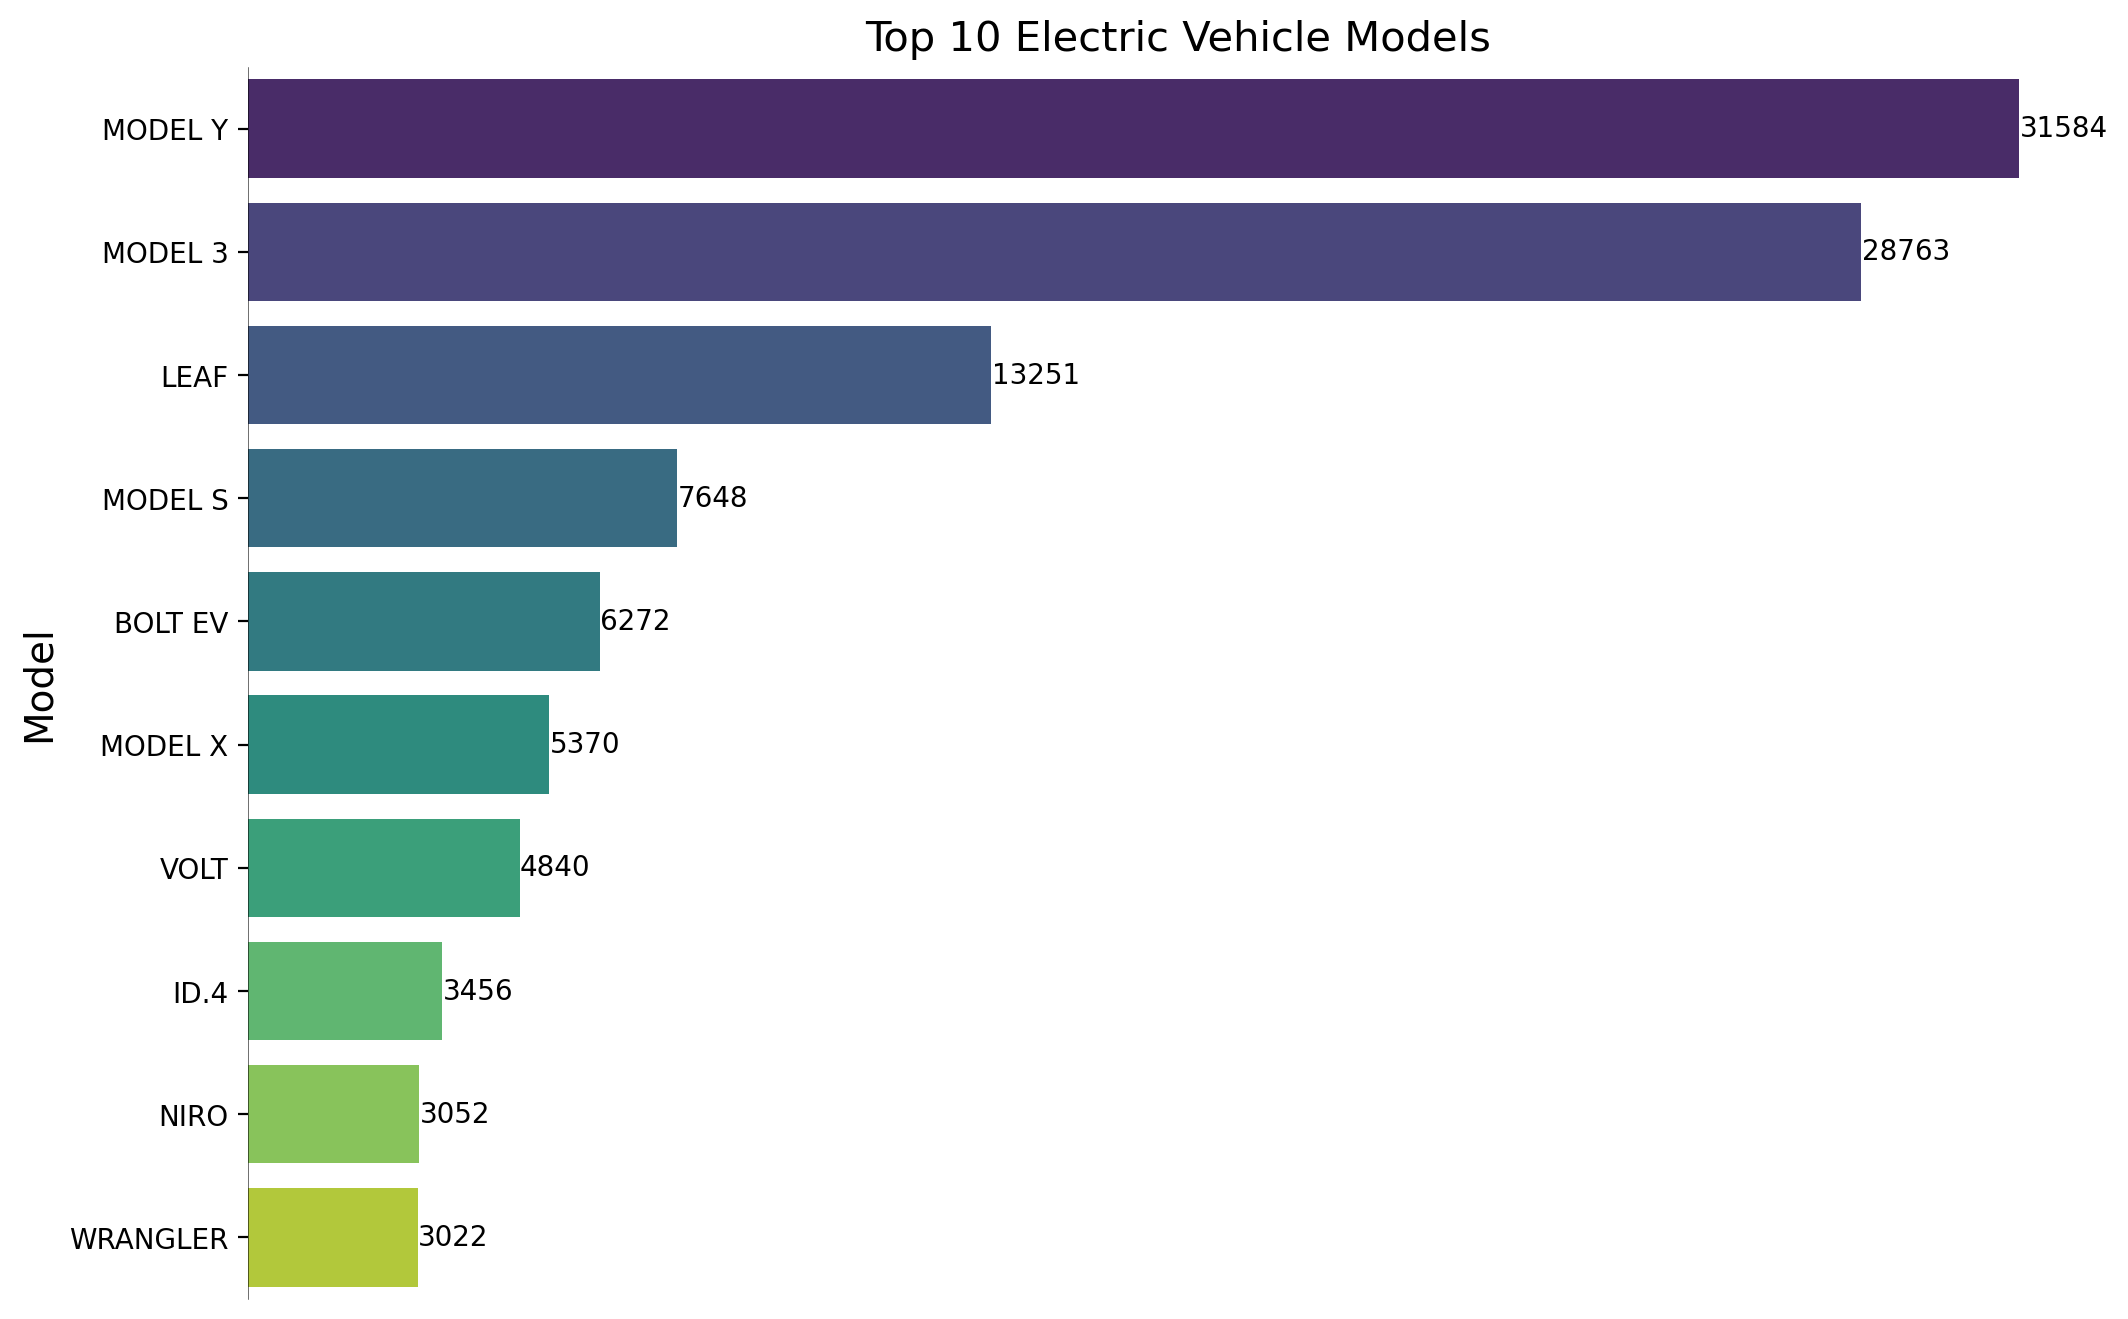

In [66]:
#Top 10 Electric Vehicle Models

TopModels = EV['Model'].value_counts().nlargest(10).index
#To filter the EV for the top 10 models
TModel = EV[EV['Model'].isin(TopModels)]

plt.figure(figsize=(12, 8))
wev = sns.countplot(y='Model', data=TModel, order=TopModels, palette='viridis', orient='h')

#Annotate each bar with its count
for p in wev.patches:
    count = int(p.get_width())
    wev.annotate(f'{count}', (p.get_x() + p.get_width() + 10, p.get_y() + p.get_height() / 2), va='center')

#To hide all wevis lines except the bottom line
sns.despine(bottom=True, right=True, top=True)

#To customize the thickness of the bottom spine
wev.spines['left'].set_linewidth(0.2)

#To remove everything on the y-wevis
wev.set_xticks([])
wev.set_xticklabels([])

plt.title('Top 10 Electric Vehicle Models', fontsize=15)
plt.xlabel('')
plt.ylabel('Model', fontsize=14)

#To save image with no background
plt.savefig('Top 10 EV Models.png', transparent=True)
plt.show()

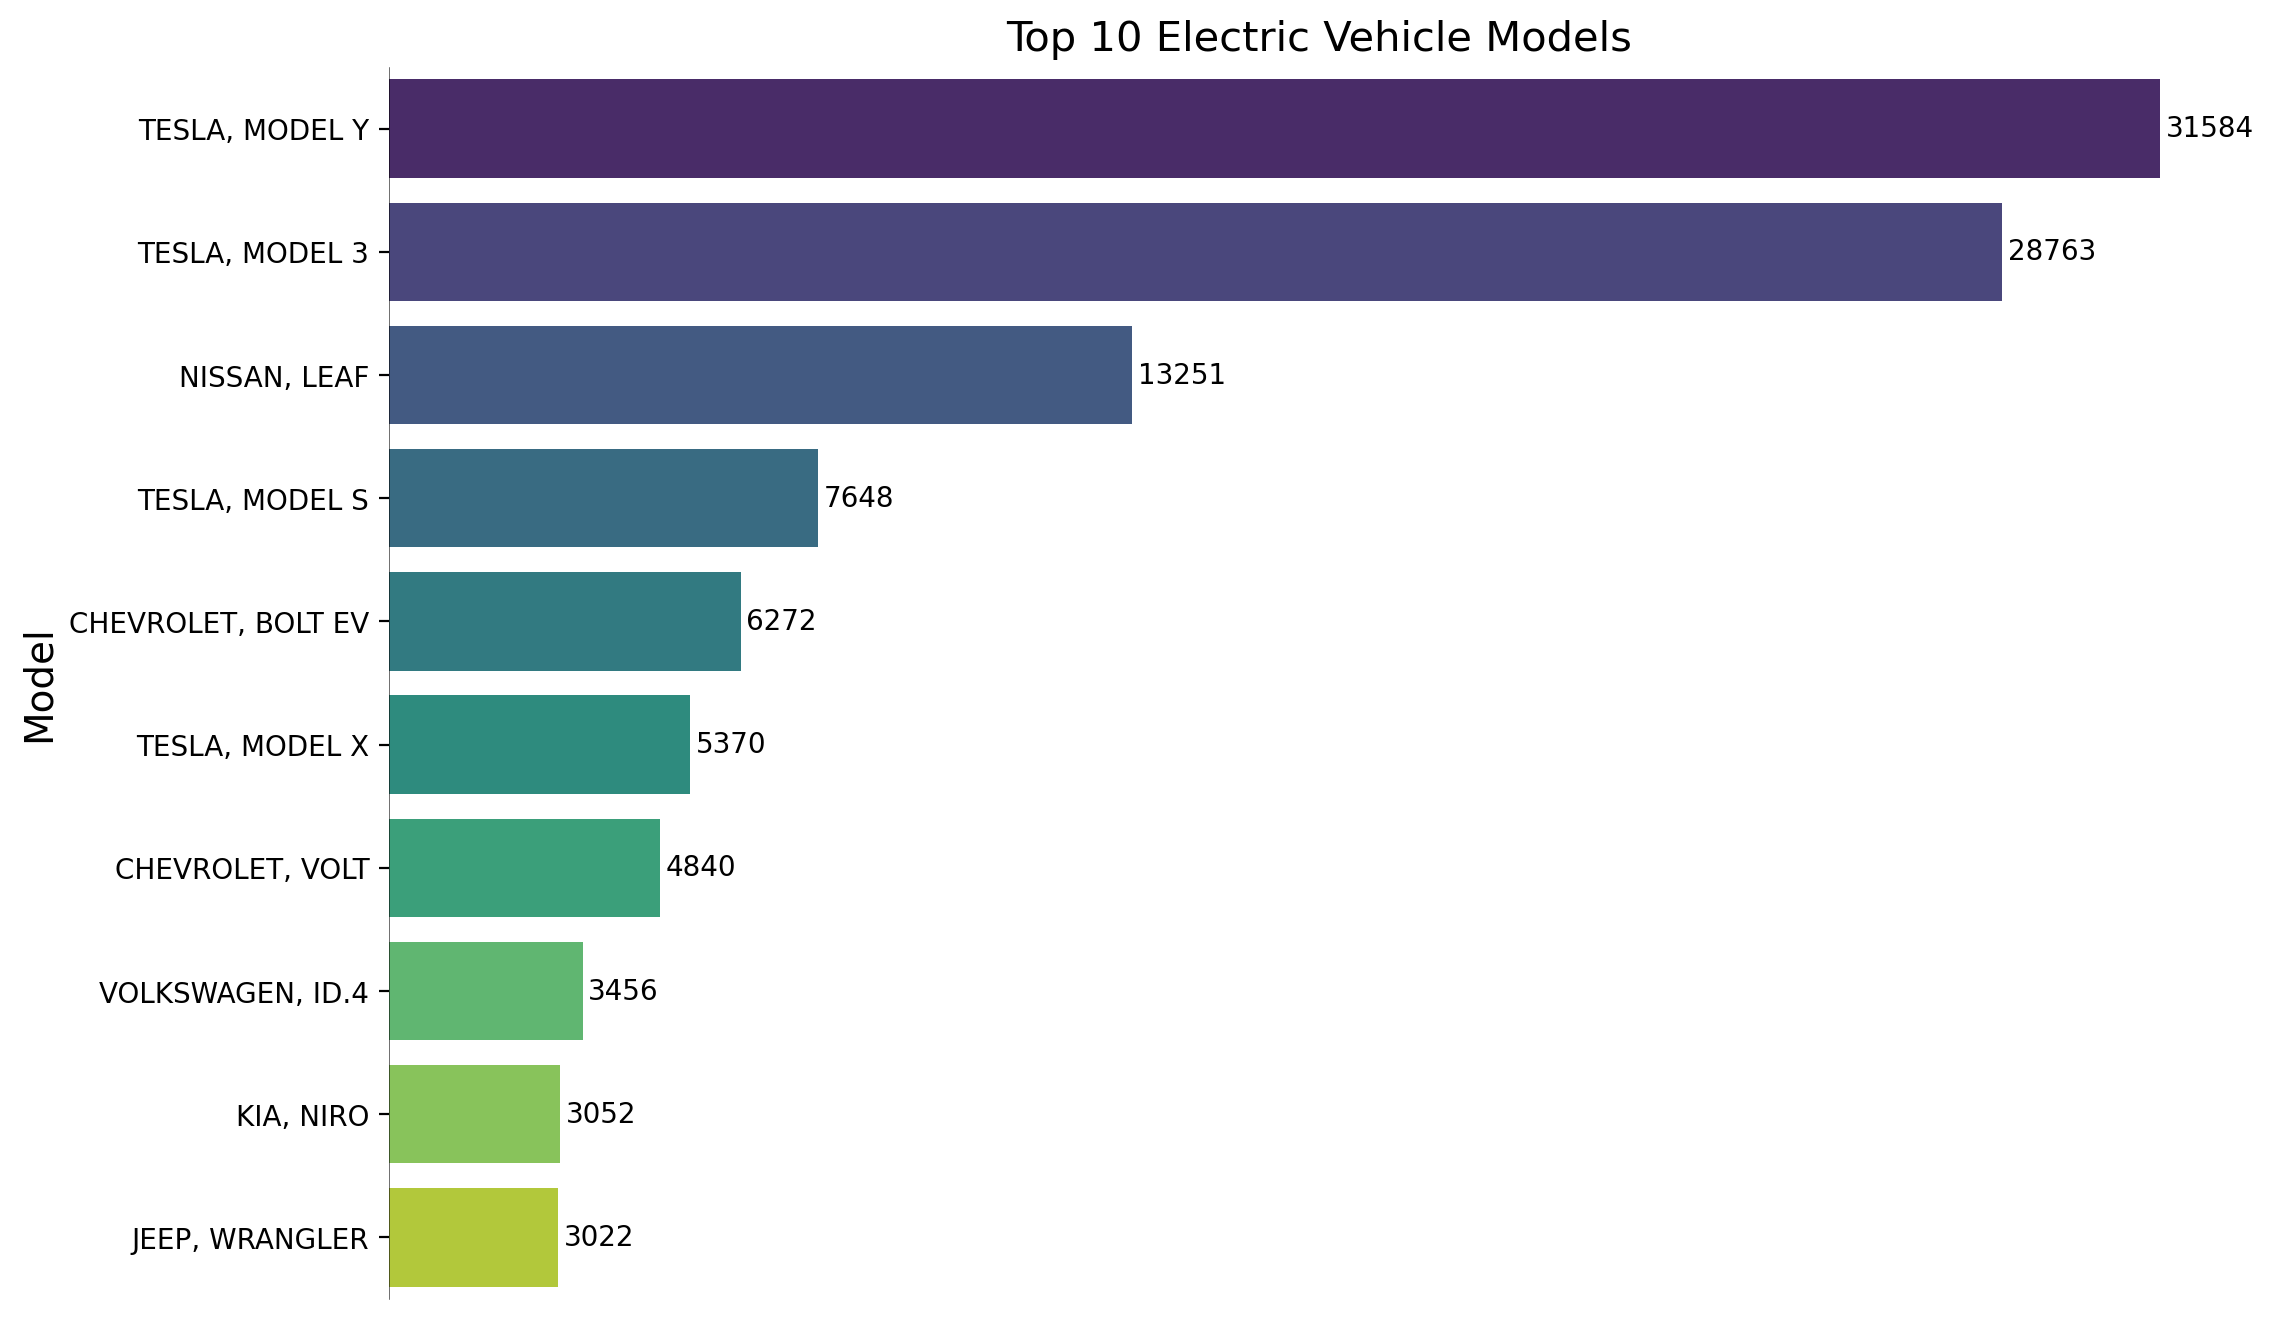

In [65]:
#Doing the same as above, but want each make to be in front of its model

EV['MakeModel'] = EV['Make'] + ', ' + EV['Model']
#Top 10 Models
TMM = EV['MakeModel'].value_counts().nlargest(10).index
#To filter the EV for the top 10 models
TM = EV[EV['MakeModel'].isin(TMM)]

plt.figure(figsize=(12, 8))
wev = sns.countplot(y='MakeModel', data=TM, order=TMM, palette='viridis', orient='h')

#Annotate each bar with its count
for p in wev.patches:
    count = int(p.get_width())
    wev.annotate(f'{count}', (p.get_x() + p.get_width() + 100, p.get_y() + p.get_height() / 2), va='center')

#To hide all wevis lines except the bottom line
sns.despine(bottom=True, right=True, top=True)

#To customize the thickness of the bottom spine
wev.spines['left'].set_linewidth(0.2)

#To remove everything on the y-wevis
wev.set_xticks([])
wev.set_xticklabels([])

plt.title('Top 10 Electric Vehicle Models', fontsize=15)
plt.xlabel('')
plt.ylabel('Model', fontsize=14)

#To save image with no background
plt.savefig('Top 10 EV MakeModels.png', transparent=True)
plt.show()

In [ ]:
#Top 10 Electric Vehicle Makes

TopMakes = EV['Make'].value_counts().nlargest(10).index
#To filter the EV for the top 10 makes
TMake = EV[EV['Make'].isin(TopMakes)]

plt.figure(figsize=(12, 8))
wev = sns.countplot(y='Make', data=TMake, order=TopMakes, palette='viridis', orient='h')

#Annotate each bar with its count
for p in wev.patches:
    count = int(p.get_width())
    wev.annotate(f'{count}', (p.get_x() + p.get_width() + 10, p.get_y() + p.get_height() / 2), va='center')

#To hide all wevis lines except the bottom line
sns.despine(bottom=True, right=True, top=True)

#To customize the thickness of the bottom spine
wev.spines['left'].set_linewidth(0.2)

#To remove everything on the y-wevis
wev.set_xticks([])
wev.set_xticklabels([])

plt.title('Top 10 Electric Vehicle Makes', fontsize=15)
plt.xlabel('')
plt.ylabel('Make', fontsize=14)

#To save image with no background
plt.savefig('Top 10 EV Makes.png', transparent=True)
plt.show()